# Jupiter's Notebook for Scenario 08
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-08-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(345145, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 341767, 1: 3378})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    345145
srcIP                  12642
srcPrt                 55080
dstIP                  11421
dstPrt                   214
flowduration          202033
total_fpackets           669
total_bpackets           884
total_fpktl            10139
total_bpktl            21841
min_fpktl                136
min_bpktl                494
max_fpktl               1238
max_bpktl                963
mean_fpktl             20585
mean_bpktl             26124
std_fpktl              35648
std_bpktl              33197
total_fipt             96096
total_bipt             80964
min_fipt               48637
min_bipt               26114
max_fipt               93993
max_bipt               72662
mean_fipt              93114
mean_bipt              78968
std_fipt               77166
std_bipt               69508
fpsh_cnt                 148
bpsh_cnt                 425
furg_cnt                   1
burg_cnt                   1
total_fhlen             3534
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(345145, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(345145, 49)
(342757, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,1447,80,5.189982,19,35,1140,47026,60,54,60,1434,60.000000,1343.599976,0.000000,319.163908,5.189982,4.878723,0.001635,0.000005,4.118753,4.167697,0.288332,0.143492,0.959897,0.713471,0,2,0,0,380,700,3.660899,6.743761,10.404660,9280.571289,891.962963,669.464417,0.169772,0.761196,1,0,0,54,0,0,0,41.250877,0
1,TCP,38892,80,5.390931,6,6,1069,983,66,66,731,370,178.166672,163.833328,270.850819,147.358632,5.390921,5.390921,0.000020,0.000047,5.207952,5.207926,1.078184,1.078184,2.309059,2.309043,1,2,0,0,200,204,1.112980,1.112980,2.225961,380.639282,171.000000,208.018799,0.955318,2.080474,2,2,0,11,0,0,0,0.919551,0
2,TCP,63109,80,0.350310,7,7,685,5546,66,66,281,1434,97.857140,792.285706,80.813421,690.290215,0.350303,0.350298,0.000018,0.000005,0.169289,0.095159,0.058384,0.058383,0.070021,0.045781,1,2,0,0,232,236,19.982309,19.982309,39.964619,17787.111328,445.071429,593.943604,0.032653,0.055226,2,2,0,13,0,0,0,8.096351,0
3,TCP,37545,25,1.007059,3,3,186,162,62,54,62,54,62.000000,54.000000,0.000000,0.000000,1.007042,1.007048,0.455635,0.455641,0.551407,0.551407,0.503521,0.503524,0.067721,0.067717,0,0,0,0,84,60,2.978971,2.978971,5.957942,345.560669,58.000000,4.381781,0.201417,0.277852,0,3,3,3,0,0,0,0.870968,0
4,TCP,80,45087,360.116302,7,0,10038,0,1434,0,1434,0,1434.000000,0.000000,0.000000,0.000000,360.116302,0.000000,60.017017,0.000000,60.023769,0.000000,60.019382,0.000000,0.002533,0.000000,0,0,0,0,224,0,0.019438,0.000000,0.019438,27.874329,1434.000000,0.000000,60.019384,0.002533,0,0,0,7,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345140,UDP,47777,53,0.082028,1,1,94,227,94,227,94,227,94.000000,227.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,60,193,12.190972,12.190972,24.381945,3913.302002,160.500000,94.045204,0.082028,0.000000,0,0,0,0,0,0,0,2.414894,0
345141,UDP,55006,53,0.069849,1,1,83,429,83,429,83,429,83.000000,429.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,49,395,14.316594,14.316594,28.633188,7330.096191,256.000000,244.658951,0.069849,0.000000,0,0,0,0,0,0,0,5.168674,0
345142,UDP,41973,53,0.000309,1,1,77,180,77,180,77,180,77.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,146,3236.345703,3236.345703,6472.691406,831740.812500,128.500000,72.832001,0.000309,0.000000,0,0,0,0,0,0,0,2.337662,0
345143,UDP,47777,53,0.043160,1,1,93,114,93,114,93,114,93.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,59,80,23.169622,23.169622,46.339245,4796.111816,103.500000,14.849242,0.043160,0.000000,0,0,0,0,0,0,0,1.225806,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 339416 of 342757 (99.0%)
> Class 1 : 3341 of 342757 (1.0%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((274205, 48), (68552, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
85143,0.001149,0.000065,0.000088,0.059408,1,1,79,373,79,373,79,373,79.0,373.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,45,339,16.832764,16.832764,33.665527,7.608409e+03,226.0,207.889389,0.059408,0.000000,0,0,0,0,0,0,0,4.721519
281596,0.001149,0.000065,0.000088,0.088567,1,1,68,68,68,68,68,68,68.0,68.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,34,34,11.290885,11.290885,22.581770,1.535560e+03,68.0,0.000000,0.088567,0.000000,0,0,0,0,0,0,0,1.000000
155760,0.001149,0.000458,0.000174,6.807642,8,0,480,0,60,0,60,0,60.0,0.0,0.0,0.0,6.807642,0.0,0.830026,0.0,1.010134,0.0,0.97252,0.0,0.063158,0.0,0,0,0,0,96,0,1.175150,0.000000,1.175150,7.050899e+01,60.0,0.000000,0.972520,0.063158,0,0,0,0,0,0,0,0.000000
211757,0.001149,0.009664,0.000088,0.000166,1,1,166,54,166,54,166,54,166.0,54.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,132,20,6026.298828,6026.298828,12052.597656,1.325786e+06,110.0,79.195961,0.000166,0.000000,0,0,0,0,0,0,0,0.325301
172535,0.001149,0.000174,0.000088,0.000105,1,1,169,54,169,54,169,54,169.0,54.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,135,20,9510.893555,9510.893555,19021.787109,2.120929e+06,111.5,81.317284,0.000105,0.000000,0,0,0,0,0,0,0,0.319527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120480,0.001149,0.002599,0.000088,0.000133,1,1,83,142,83,142,83,142,83.0,142.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,49,108,7530.168945,7530.168945,15060.337891,1.694288e+06,112.5,41.719299,0.000133,0.000000,0,0,0,0,0,0,0,1.710843
260798,0.001149,0.000065,0.000088,0.000112,1,1,164,54,164,54,164,54,164.0,54.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,130,20,8943.079102,8943.079102,17886.158203,1.949591e+06,109.0,77.781746,0.000112,0.000000,0,0,0,0,0,0,0,0.329268
132642,0.001149,0.000458,0.000088,0.000172,1,1,169,54,169,54,169,54,169.0,54.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,135,20,5809.285156,5809.285156,11618.570312,1.295471e+06,111.5,81.317284,0.000172,0.000000,0,0,0,0,0,0,0,0.319527
147675,0.001149,0.000065,0.000088,0.000137,1,1,172,54,172,54,172,54,172.0,54.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,138,20,7307.149902,7307.149902,14614.299805,1.651416e+06,113.0,83.438599,0.000137,0.000000,0,0,0,0,0,0,0,0.313953


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
77279,0.001149,4.583380e-04,0.000088,0.000137,1,1,107,54,107,54,107,54,107.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,73,20,7307.149902,7307.149902,14614.299805,1.176451e+06,80.500000,37.476658,0.000137,0.000000,0,0,0,0,0,0,0,0.504673
161121,0.001149,2.389618e-05,0.000088,7.703350,2,2,148,300,74,150,74,150,74.000000,150.000000,0.000000,0.000000,0.419094,0.000067,0.419094,0.000067,0.419094,0.000067,0.419094,0.000067,0.000000,0.000000,0,0,0,0,80,232,0.259627,0.259627,0.519255,5.815652e+01,112.000000,43.878620,2.567783,4.089897,0,0,0,0,0,0,0,2.027027
267437,0.001149,8.804674e-06,0.000088,0.000331,1,1,72,281,72,281,72,281,72.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,247,3021.832764,3021.832764,6043.665527,1.066707e+06,176.500000,147.785324,0.000331,0.000000,0,0,0,0,0,0,0,3.902778
2728,0.051603,1.152013e-03,0.000407,1.790655,6,5,562,898,66,66,224,622,93.666664,179.600006,63.930174,247.363697,1.790655,1.790607,0.000381,0.000072,1.333908,1.580251,0.358131,0.447652,0.553774,0.761276,1,1,0,0,200,172,3.350729,2.792274,6.143004,8.153442e+02,132.727273,168.917191,0.312759,0.544571,2,2,0,10,0,0,0,1.597865
105462,0.001149,6.468173e-05,0.000088,0.000220,1,1,75,140,75,140,75,140,75.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,41,106,4544.208008,4544.208008,9088.416016,9.770048e+05,107.500000,45.961941,0.000220,0.000000,0,0,0,0,0,0,0,1.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53890,0.051603,1.087574e-09,0.000407,5.004850,9,10,1084,9609,60,54,598,1434,120.444443,960.900024,179.094322,650.264638,5.004850,5.004506,0.000041,0.000008,4.188718,4.487739,0.625606,0.556056,1.445283,1.476184,1,3,0,0,192,212,1.798256,1.998062,3.796318,2.136528e+03,562.789474,641.531860,0.289840,0.978770,1,2,2,18,0,0,0,8.864391
27064,0.051603,8.804674e-06,0.000407,16.394530,16,18,1699,20105,60,66,385,1434,106.187500,1116.944458,108.696651,577.793826,16.394530,8.469174,0.003244,0.000005,7.436128,4.520397,1.092969,0.498187,2.087024,1.202703,2,4,0,0,512,588,0.975935,1.097927,2.073863,1.329956e+03,641.294118,663.014343,0.614127,1.594816,1,2,1,33,0,0,0,11.833431
341155,0.001149,1.152013e-03,0.000088,1.238532,1,1,77,77,77,77,77,77,77.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,0.807408,0.807408,1.614815,1.243408e+02,77.000000,0.000000,1.238532,0.000000,0,0,0,0,0,0,0,1.000000
284670,0.001149,1.152013e-03,0.000088,0.000216,1,1,85,136,85,136,85,136,85.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,102,4629.474609,4629.474609,9258.949219,1.023114e+06,110.500000,36.062447,0.000216,0.000000,0,0,0,0,0,0,0,1.600000


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.450586,-0.183321,-0.099134,-0.079351,-0.068387,-0.073588,-0.053707,-0.069177,-0.193415,2.188268,-0.408242,0.169266,-0.406921,0.506663,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.050114,-0.007353,-0.167049,-0.340687,-0.237830,-0.348344,0.331218,0.493846,-0.336317,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,0.352129
1,-0.450586,-0.183321,-0.099134,-0.079128,-0.068387,-0.073588,-0.054586,-0.071844,-0.606590,-0.719444,-0.475007,-0.584864,-0.691392,-0.621994,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.053244,-0.127637,-0.167304,-0.341590,-0.238291,-0.352253,-0.641250,-0.706651,-0.330627,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.397877
2,-0.450586,-0.175441,-0.098243,-0.027623,0.016153,-0.083347,-0.021659,-0.072439,-0.907082,-1.367721,-0.523563,-0.752998,-0.898280,-0.873629,-0.352708,-0.374084,-0.017654,-0.087681,-0.019239,-0.099049,-0.211890,-0.227262,-0.094688,-0.177292,-0.221729,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.035605,-0.141046,-0.167770,-0.343430,-0.239181,-0.353196,-0.690489,-0.706651,-0.158135,-0.254771,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.599410
3,-0.450586,0.008838,-0.099134,-0.079805,-0.068387,-0.073588,-0.046754,-0.071967,3.074426,-0.852913,0.119804,-0.619479,1.842986,-0.673801,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.025364,-0.133158,0.109601,0.638414,0.261925,0.500160,-0.382746,-0.249319,-0.347877,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.533851
4,-0.450586,-0.181136,-0.099134,-0.079806,-0.068387,-0.073588,-0.046514,-0.071967,3.187111,-0.852913,0.138012,-0.619479,1.920569,-0.673801,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.024510,-0.133158,0.270017,1.206147,0.551708,1.011990,-0.373514,-0.237069,-0.347889,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.535015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274200,-0.450586,-0.132588,-0.099134,-0.079806,-0.068387,-0.073588,-0.053387,-0.071197,-0.043169,-0.013967,-0.383964,-0.401894,-0.303477,-0.348156,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.048976,-0.098454,0.178833,0.883435,0.386989,0.737363,-0.367359,-0.465735,-0.347884,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.254620
274201,-0.450586,-0.183321,-0.099134,-0.079806,-0.068387,-0.073588,-0.046914,-0.071967,2.999304,-0.852913,0.107665,-0.619479,1.791264,-0.673801,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.025933,-0.133158,0.243878,1.113635,0.504488,0.901700,-0.388901,-0.257485,-0.347888,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.533052
274202,-0.450586,-0.175441,-0.099134,-0.079805,-0.068387,-0.073588

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.450586,-0.175441,-0.099134,-0.079806,-0.068387,-0.073588,-0.051469,-0.071967,0.858304,-0.852913,-0.238296,-0.619479,0.317187,-0.673801,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.042149,-0.133158,0.168566,0.847099,0.368442,0.404034,-0.564314,-0.490235,-0.347883,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.497702
1,-0.450586,-0.184137,-0.099134,-0.020757,-0.056310,-0.063829,-0.048192,-0.069815,-0.381222,0.062301,-0.438590,-0.382114,-0.536226,-0.318551,-0.352708,-0.374084,-0.066780,-0.087680,-0.085586,-0.099038,-0.256691,-0.227257,-0.169775,-0.177283,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.040157,-0.049551,-0.167812,-0.343388,-0.239208,-0.353204,-0.370436,-0.453265,0.153161,0.563378,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.190898
2,-0.450586,-0.184440,-0.099134,-0.079804,-0.068387,-0.073588,-0.054266,-0.069982,-0.456345,1.311188,-0.450729,-0.058209,-0.587948,0.166216,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.052106,-0.043636,-0.028712,0.148907,0.012070,0.333392,0.026552,0.146764,-0.347845,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,0.187126
3,2.219330,-0.161556,-0.095828,-0.066081,-0.008001,-0.034551,-0.015106,-0.064586,-0.681713,-0.738511,0.471835,0.784933,-0.027626,-0.209016,0.674578,1.070537,-0.056233,-0.065840,-0.153189,-0.099037,-0.187349,-0.117451,-0.178046,-0.116170,-0.115938,-0.058813,-0.002041,-0.021830,0.0,0.0,-0.006019,-0.073214,-0.167670,-0.342975,-0.238974,-0.352716,-0.242863,0.268793,-0.286879,-0.156958,2.477232,2.093946,-0.175043,-0.009466,0.0,-0.005199,-0.00191,-0.277388
4,-0.450586,-0.183321,-0.099134,-0.079805,-0.068387,-0.073588,-0.054026,-0.071215,-0.343661,-0.033034,-0.432520,-0.406840,-0.510365,-0.355557,-0.352708,-0.374084,-0.070003,-0.087681,-0.153250,-0.099049,-0.288458,-0.227262,-0.226636,-0.177292,-0.235347,-0.206821,-0.018174,-0.036646,0.0,0.0,-0.051252,-0.099242,0.041372,0.396942,0.138672,0.275652,-0.398133,-0.441235,-0.347867,-0.267603,-0.383868,-0.427741,-0.175043,-0.064902,0.0,-0.005199,-0.00191,-0.223216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68547,2.219330,-0.184616,-0.095828,-0.041442,0.028231,0.014245,0.026613,0.011584,-0.907082,-0.852913,2.741827,2.792650,0.664874,2.682196,2.525136,3.423506,-0.031517,-0.026637,-0.153244,-0.099048,0.029044,0.084589,-0.141756,-0.101369,0.076296,0.080180,-0.002041,0.007804,0.0,0.0,-0.008295,-0.057439,-0.167741,-0.343104,-0.239072,-0.351866,2.404110,2.997995,-0.291351,-0.068738,1.046682,2.093946,6.616758,0.034882,0.0,-0.005199,-0.00191,1.187051
68548,2.219330,-0.184440,-0.095828,0.045865,0.112771,0.092318,0.075763,0.103363,-0.907082,-0.738511,1.449024,2.792650,0.296175,3.259641,1.393925,3.000272,0.056067,0.015624,-0.152726,-0.099048,0.275195,0.086859,-0.078346,-0.109270,0.214673,0.027009,0.014093,0.022620,0.0,0.0,0.082741,0.090846,-0.167779,-0.343251,-0.239144,-0.352385,2.887295,3.122050,-0.228071,0.056430,1.046682,2.093946,3.220858,0.118036,0.0,-0.005199,-0.00191,1.785408
68549,-0.450586,-0.161556,-0.099134,-0.070313,-0.068387,-0.073588,-0.053867,-0.071765,-0.268538,-0.633643,-0.420381,-

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'flow_ece', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((274205, 45), (68552, 45))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=GridSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)

In [33]:
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 1.5min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 1.5min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 1.6min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 1.6min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 1.6min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 1.7min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.997 total time= 1.6min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 1.7min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 1.7min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 1.7min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.996 total time= 3.3min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [34]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9966886088875112


In [35]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     67861
     class 1       0.68      0.98      0.80       691

    accuracy                           1.00     68552
   macro avg       0.84      0.99      0.90     68552
weighted avg       1.00      1.00      1.00     68552



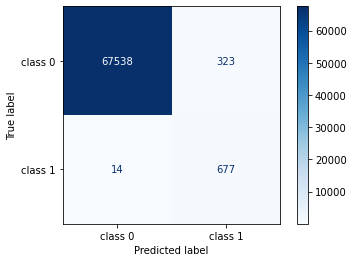

In [36]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [38]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Origianl dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 271555, 1: 2650})
Resample dataset shape: Counter({0: 271555, 1: 271555})


### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [39]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=GridSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)
model2.fit(X_smote,y_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 5.4min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 5.0min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 5.0min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 5.3min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.995 total time= 5.2min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 3.4min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 3.2min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 3.3min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 3.4min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.996 total time= 3.7min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.997 total time= 9.0min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [40]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9971810498793984
Best Model: LogisticRegression(C=100.0, max_iter=1000, solver='saga')


In [41]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     67861
     class 1       0.69      0.98      0.81       691

    accuracy                           1.00     68552
   macro avg       0.85      0.99      0.90     68552
weighted avg       1.00      1.00      1.00     68552



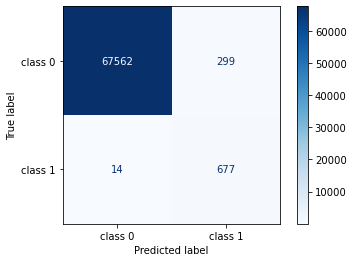

In [42]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-SVM)

In [43]:
#Run grid search only on training set using cross-validation
parameters = {'criterion':['gini','entropy'], 'max_depth' : [2,4,6,8,10,12]}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.9s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.7s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.8s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.995 total time=   0.8s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.996 total time=   0.7s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=1.000 total time=   1.1s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=1.000 total time=   1.2s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=1.000 total time=   1.6s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=1.000 total time=   1.6s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.999 total time=   1.1s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=1.000 total time=   1.1s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [44]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12}
accuracy : 0.9999452964023268
Best Model: DecisionTreeClassifier(class_weight='balanced', max_depth=12)


In [45]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     67861
     class 1       0.99      0.52      0.68       691

    accuracy                           1.00     68552
   macro avg       0.99      0.76      0.84     68552
weighted avg       1.00      1.00      0.99     68552



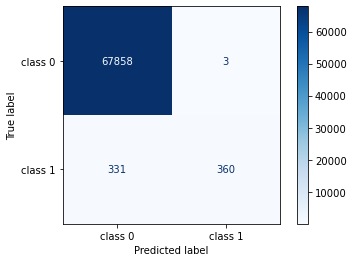

In [46]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [48]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [49]:
# define the undersampling method
oss = OneSidedSelection(random_state=0)
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
# summarize the new class distribution
counter = Counter(y_oss)
print(counter)

Counter({0: 250323, 1: 2650})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [50]:
#Run grid search only on training set using cross-validation
parameters = {'C':[1, 5, 10] }
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5, verbose=3)
model4.fit(X_oss, y_oss)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=1;, score=1.000 total time= 1.0min
[CV 2/5] END ...............................C=1;, score=1.000 total time=  57.8s
[CV 3/5] END ...............................C=1;, score=1.000 total time= 1.3min
[CV 4/5] END ...............................C=1;, score=0.999 total time= 1.5min
[CV 5/5] END ...............................C=1;, score=1.000 total time= 6.2min
[CV 1/5] END ...............................C=5;, score=1.000 total time=  40.5s
[CV 2/5] END ...............................C=5;, score=1.000 total time=  34.0s
[CV 3/5] END ...............................C=5;, score=1.000 total time= 1.6min
[CV 4/5] END ...............................C=5;, score=1.000 total time=  32.5s
[CV 5/5] END ...............................C=5;, score=1.000 total time=  31.2s
[CV 1/5] END ..............................C=10;, score=1.000 total time=  28.9s
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10]}, verbose=3)

In [51]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10}
accuracy : 0.9998497869033638
Best Model: SVC(C=10, class_weight='balanced')


In [52]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     67861
     class 1       0.99      0.98      0.99       691

    accuracy                           1.00     68552
   macro avg       1.00      0.99      0.99     68552
weighted avg       1.00      1.00      1.00     68552



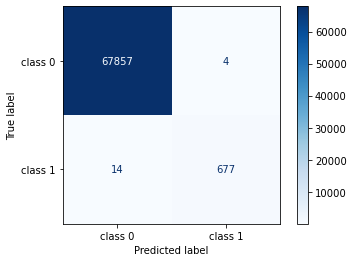

In [53]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [55]:
#Run grid search only on training set using cross-validation
parameters = {'max_depth': [5, 10],'n_estimators': [100, 150], 'learning_rate': [0.1, 0.2]}
model5 = GridSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False), parameters, cv=5, verbose=3)
model5.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   3.8s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   3.9s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   3.9s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   6.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   5.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   5.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   6.9s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

In [56]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("accuracy :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}
accuracy : 0.999967177841396
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [57]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     67861
     class 1       1.00      0.98      0.99       691

    accuracy                           1.00     68552
   macro avg       1.00      0.99      1.00     68552
weighted avg       1.00      1.00      1.00     68552



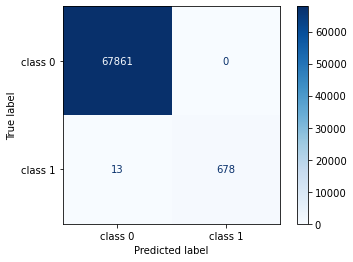

In [58]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [59]:
#save notebook session
import dill
dill.dump_session('session_esc-08.db')
#to restore a notebook session
#dill.load_session('session_esc-08.db')